# Introduction to Data Science – Homework 6
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 03 2023, 11:59pm.

In Part 1 of this homework you will scrape github repositories and organize the information in a Pandas dataframe. In Part 2, you will use linear regression to gain meaningful insights. 

## Your Data
First Name: Melissa
<br>
Last Name: Frisby
<br>
E-mail: u1175875@utah.edu
<br>
UID: u1175875
<br>

In [1]:
# imports and setup 
from bs4 import BeautifulSoup
# you can use either of these libraries to get html from a website
import time
import os

import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 
# where the data is stored
DATA_PATH = "data"

### 1. Scrape Github Repository List using BeautifulSoup
In this part you will explore Github repositories, specifically the 100 most-starred repositories. You are going to scrape data from [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before you start to scrape any website you should go through the terms of service and policy documents of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/)(see the tiny "terms" link at the bottom of the page) to see whether the site permits you to scrape their data or not. Are you sure you are allowed to scrape?

**Your solution:**
Yes, but with some limitations of how often to prevent getting the account blocked.

### Task 1.2 Load the Data

To avoid any problems with GitHub blocking us from downloading the data many times, we have downloaded and saved all the html files in the [data](data) folder. Note that the data folder is not completely consistent with what you see on the web – we've made a few patches to the data that makes your task here easier. You will be treating the data folder as your website to be scraped. The path to data folder is stored in `DATA_PATH` variable.

In the data folder you will find first 10 pages of highly starred repositories saved as `searchPage1.html`,`searchPage2.html`,`searchPage3.html` ... `searchPage10.html`

Check out page 10 if you want to see what happens if you scrape to quickly ;). 

Now read these html files in python and create a soup object. This is a two step process:
 * Read the text in the html files
 * Create the soup from the files that you've read. 

In [2]:
## Your code goes here
file = [0]*10

for x in range(len(file)):
    file[x] = BeautifulSoup(open(f'data/searchPage{x+1}.html', encoding = 'UTF-8'), 'html.parser')
    
print(file[1].prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="https://github.githubassets.com" rel="dns-prefetch"/>
  <link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-6548d5a1dd84bd83036c6a914b25b4ae.css" integrity="sha512-ZUjVod2EvYMDbGqRSyW0rpfgBq3i+gnR/4PfrzLsy5f20oIcRfgFQFVKgi3Ztp917bP1K/kdP5q8+nAlJ3+cFA==" media="all" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-1cd57b56e5c8f7c49216299a13bafc79.css" integrity="sha512-HNV7VuXI9

### Extracting Data

Extract the following data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

+ The name of the repository
+ The primary language (there are multiple or none, if multiple, use the first one, if none, use "none")
+ The number of watches
+ The number of stars
+ Number of commits
+ Number of branches
+ Number of contributors
+ Length of readme file.
+ Number of pull requests

Here's an example for one repository on how that data could look like: 
```python
{'name': 'Python-100-Days',
'language': 'Jupyter Notebook',
'watches': '4822',
'stars': '78068',
'commits': 296,
'branches': 1,
'contributors': 12,
'readme': 11159,
'pull_request':85}
```

### Task 1.3 Extract repository URLs

If you look at the results of the 100 most-starred repositories [(this list)](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories), you will notice that all the information we want to extract for each repository is not in that list. This information is in the repository’s individual web page, for example [996icu](https://github.com/996icu/996.ICU). 

Therefore, you will first have to extract links of each repository from the soup you scraped earlier. When you extract the link for the repository, it will be a path to the stored HTML page for the repository. You will use this path to read the file and extract the above information.

Refer to the scraping lecture for details on how to do this. We recommend you use the web inspector to identify the relevant structures.

Example of a link that you need to extract - 996icu/996.ICU.html

In [3]:
links = {}

for content in file:
    for a in content.select('a.v-align-middle'):
        link = a.get('href')
        text = a.get_text().split(" - ")
        links[text[0].strip()] = (f'data/{link}')
print(links)

{'freeCodeCamp/freeCodeCamp': 'data/freeCodeCamp/freeCodeCamp.html', '996icu/996.ICU': 'data/996icu/996.ICU.html', 'vuejs/vue': 'data/vuejs/vue.html', 'facebook/react': 'data/facebook/react.html', 'tensorflow/tensorflow': 'data/tensorflow/tensorflow.html', 'twbs/bootstrap': 'data/twbs/bootstrap.html', 'EbookFoundation/free-programming-books': 'data/EbookFoundation/free-programming-books.html', 'sindresorhus/awesome': 'data/sindresorhus/awesome.html', 'getify/You-Dont-Know-JS': 'data/getify/You-Dont-Know-JS.html', 'ohmyzsh/ohmyzsh': 'data/ohmyzsh/ohmyzsh.html', 'jwasham/coding-interview-university': 'data/jwasham/coding-interview-university.html', 'kamranahmedse/developer-roadmap': 'data/kamranahmedse/developer-roadmap.html', 'github/gitignore': 'data/github/gitignore.html', 'airbnb/javascript': 'data/airbnb/javascript.html', 'microsoft/vscode': 'data/microsoft/vscode.html', 'CyC2018/CS-Notes': 'data/CyC2018/CS-Notes.html', 'd3/d3': 'data/d3/d3.html', 'flutter/flutter': 'data/flutter/fl

### Task 1.4 Extracting required information

Once you have extracted links for each repository, you can start parsing those HTML pages using BeautifulSoup and extract all the required information.

**Note: There are few repositories which do not contain 'issues' field (such as 996icu/996.ICU.html). Therefore, write your code such that it handles this condition as well.**

Save the dataframe you created to a new file project_info.csv and *include this in your submission*. You will loose points if you don't.

You also need to make sure that you reformat all numerical columns to be integer data. You can do that either as you parse, or when you have a dataframe with strings.

Note that there is one repository flagged as having infinite contributers (the Linux kernel). We'll assume that it in fact has 15600 contributors (an estimate based on a google search).

In [4]:
# soup.find(title = 'README.md') # readme
# Watches and/or Contributors, Stars, Commits, Pull Requests, Branches
project_info = pd.DataFrame()
for key in links:
    soup = BeautifulSoup(open(links[key], encoding = 'UTF-8'), 'html.parser')
    readme = soup.find(id = 'readme').get_text()
    commit = soup.find_all(class_ = 'num text-emphasized')[0].get_text().strip()
    commit = commit.replace(',', '')
    branch = soup.find_all(class_ = 'num text-emphasized')[1].get_text().strip()
    branch = branch.replace(',', '')
    cont_test = soup.find_all(class_ = 'num text-emphasized')[4].get_text().strip()
    if cont_test == '∞':
        cont = '15600'
    else:
        cont = soup.find_all(class_ = 'num text-emphasized')[4].get_text().strip()
    cont = cont.replace(',', '')
    watch = soup.select('a.social-count')[0].get_text().strip()
    watch = watch.replace('k', '')
    watch = float(watch)
    star = soup.select('a.social-count')[1].get_text().strip()
    star = star.replace('k', '')
    star = float(star)
    pull_test = soup.find_all(class_ = 'Counter')
    if len(pull_test) <= 1:
        pulls = soup.find_all(class_ = 'Counter')[0].get_text().strip()
    else:
        pulls = soup.find_all(class_ = 'Counter')[1].get_text().strip()
    
    data = [float(cont), star, len(readme), float(commit), float(pulls), float(branch), float(watch)]
    project_info[key] = data
    
project_info.index = ['Contributors', 'Stars', 'Readme', 'Commits', 'Pull_reqs', 'Branches', 'Watchers']
project_info = project_info.transpose(copy = False)
project_info.to_csv('project_info.csv', index=False)

### 2. Analyzing the repository data

In this part, you will analyze the data collected in Part 1 using regression tools. The goal is to identify properties that make a repository popular. 

First, load the `project_info.csv` file in again. **We need you to do this so that we can run your code below without having to run your scraping code, which can be slow.**

In [5]:
project_info = pd.read_csv('project_info.csv')
project_info.index = links
project_info

,Contributors,Stars,Readme,Commits,Pull_reqs,Branches,Watchers
freeCodeCamp/freeCodeCamp,3999.0,309.0,6216.0,25355.0,89.0,5.0,8.4
996icu/996.ICU,605.0,249.0,4672.0,3019.0,25.0,1.0,4.5
vuejs/vue,289.0,157.0,2910.0,3085.0,152.0,44.0,6.0
facebook/react,1361.0,144.0,3324.0,12812.0,98.0,49.0,6.6
tensorflow/tensorflow,2396.0,141.0,3495.0,78840.0,245.0,33.0,8.5
...,...,...,...,...,...,...,...
adam-p/markdown-here,12.0,43.8,10315.0,807.0,17.0,10.0,1.0
h5bp/Front-end-Developer-Interview-Questions,208.0,43.6,2697.0,786.0,0.0,3.0,2.4
resume/resume.github.com,48.0,43.6,554.0,263.0,6.0,6.0,336.0
josephmisiti/awesome-machine-learning,416.0,43.5,99158.0,1368.0,0.0,2.0,3.3


### Task 2.1 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what you see.

You can re-use code from your previous homework here.

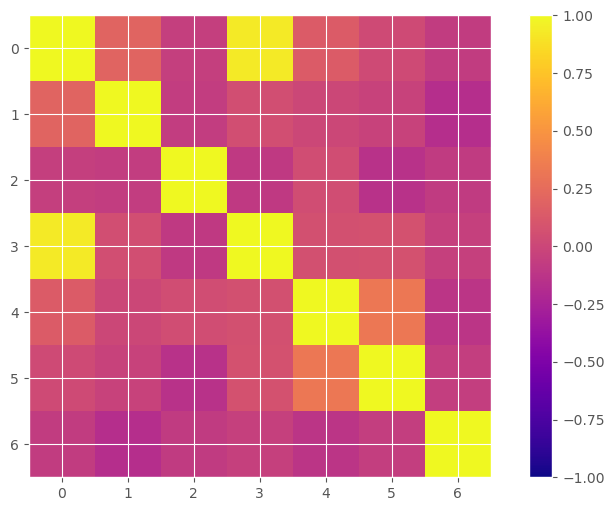

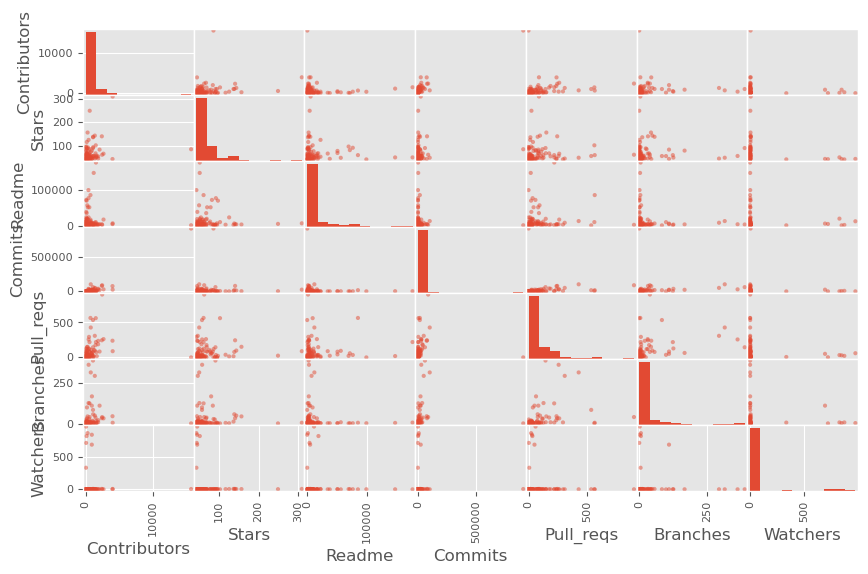

In [9]:
# your code goes here
project_info.describe()
project_info.corr()
plt.imshow(project_info.corr(), cmap = 'plasma', vmin = -1, vmax = 1)
plt.colorbar(cmap = 'plasma')
plt.show()

pd.plotting.scatter_matrix(project_info);

**Your Interpretation:** It is harder to visualize correlations with the scatter matrix, so it is best to look at the heatmap to determine which variables are correlated. There is obviously a high correlation between contributors and commits, since the contributors would be committing to the repository. There also appears to be a higher correlation between stars and contributors, as well as stars and pull requests, and pull requests and branches.

### 2.2. Linear regression

1. Use linear regression to try to predict the number of Stars based on Commits, Pull Requests, Branches. Explain why this is not a very good model by discussing the R-squared , F-statistic p-value, and coefficient  p-values. 
+ Develop another model which is better. Explain why it is better and interpret your results. Hint: try using variable Watches and/or Contributors. 

In [15]:
# your code goes here
model1 = sm.ols(formula = 'Stars ~ Commits + Pull_reqs + Branches', data = project_info).fit()
print(model1.summary())

model2 = sm.ols(formula = 'Stars ~ Contributors + Commits', data = project_info).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Stars   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.1100
Date:                Fri, 10 Mar 2023   Prob (F-statistic):              0.954
Time:                        16:09:52   Log-Likelihood:                -461.41
No. Observations:                  90   AIC:                             930.8
Df Residuals:                      86   BIC:                             940.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0136      5.430     13.077      0.0

**Your interpretation:** The first model using branches, pull requests, and commits only is not a good model because the R<sup>2</sup> value is very low at 0.004, the F-statistic probability is very high at nearly 1, and all of the coefficient p-values are much larger than 0.05 that we want. The second model is better because the R<sup>2</sup> value is much higher, the F-statistic probability is very low, and all the coefficient p-values are basically zero, which is what we want in a good model. 